In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
name = "Spectral-Class"
data_dir = join(root_data_dir, name)
data_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class'

In [4]:
file = join(data_dir, "thin-AG-extended.hdf5")

df = vaex.open(file)
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

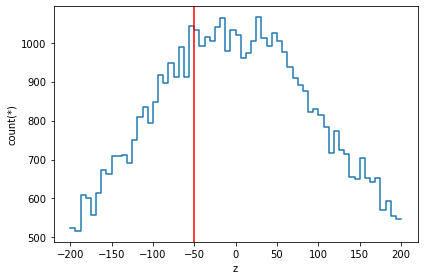

In [5]:
df.viz.histogram("z")
plt.axvline(-50, color="red")

In [6]:
from astroquery.utils.tap.core import TapPlus
# Vizier TAP service
tap = TapPlus(url="http://TAPVizieR.u-strasbg.fr/TAPVizieR/tap")

def query_vizier(query, verbose=False):
    """Query Vizier TAP service."""
    job = tap.launch_job(query, verbose=verbose)
    return job.get_results()

query = """
SELECT TOP 10000 Source, plx, glon, glat, PMemb, Cluster
FROM "J/A+A/618/A93/members"
WHERE plx > 0 AND 1000/plx < 300 
"""

result = query_vizier(query)
result

Source,plx,GLON,GLAT,PMemb,Cluster
,mas,deg,deg,,
int64,float64,float64,float64,float64,object
51497864767442176,7.0159,170.8774790187,-24.0139737241,0.2,Melotte_22
51558956382579200,7.2931,170.660227799,-24.6422053481,0.1,Melotte_22
51616268426009472,7.4402,170.2788965833,-24.8422992871,1.0,Melotte_22
51619120284286976,7.3916,170.1785328624,-24.8281127315,0.9,Melotte_22
51677669278703104,7.5788,170.5413529051,-24.2020414637,0.7,Melotte_22
51694746068624128,7.2266,170.7950989841,-23.7781450767,1.0,Melotte_22
51717114258148864,7.1858,170.3945229144,-23.7775208459,0.2,Melotte_22
51742471745296768,7.4544,169.9875094794,-24.323109763,0.9,Melotte_22


In [7]:
# group by cluster
df_clusters = result.to_pandas().groupby("Cluster")
# get cluster names
cluster_names = df_clusters.groups.keys()
cluster_names

dict_keys(['ASCC_123', 'ASCC_41', 'ASCC_99', 'Alessi_13', 'Alessi_3', 'Alessi_9', 'Blanco_1', 'Collinder_135', 'IC_2391', 'IC_2602', 'IC_348', 'Mamajek_1', 'Melotte_20', 'Melotte_22', 'NGC_1333', 'NGC_2232', 'NGC_2451A', 'NGC_2632', 'NGC_6475', 'NGC_7092', 'Platais_10', 'Platais_3', 'Platais_8', 'Platais_9', 'Ruprecht_147'])

In [8]:
# filter out members with PMemb < 0.5
result = result[result["PMemb"] > 0.5]
result

Source,plx,GLON,GLAT,PMemb,Cluster
,mas,deg,deg,,
int64,float64,float64,float64,float64,object
51616268426009472,7.4402,170.2788965833,-24.8422992871,1.0,Melotte_22
51619120284286976,7.3916,170.1785328624,-24.8281127315,0.9,Melotte_22
51677669278703104,7.5788,170.5413529051,-24.2020414637,0.7,Melotte_22
51694746068624128,7.2266,170.7950989841,-23.7781450767,1.0,Melotte_22
51742471745296768,7.4544,169.9875094794,-24.323109763,0.9,Melotte_22
51760270089541504,7.0455,170.2331075522,-23.8273629767,0.6,Melotte_22
51765595848971648,7.1487,170.3096287001,-23.7271393553,0.6,Melotte_22
53206780715340032,7.416,170.6041870361,-23.4478852618,0.7,Melotte_22


In [9]:
df_filtered = df[~df.source_id.isin(result["Source"])]
df_filtered

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

In [10]:
# Hyades

query = """
SELECT TOP 10000 Memb, HIP,plx	
FROM "J/A+A/331/81/table2"
"""

hyades = query_vizier(query)
hyades = hyades.to_pandas()
hyades = hyades[hyades["Memb"] == "1"]
hyades

,Memb,HIP,plx
1,1,10672,15.37
3,1,12709,53.89
5,1,13117,29.67
6,1,13600,18.89
8,1,13806,25.77
...,...,...,...
263,1,24923,18.26
265,1,25639,11.58
271,1,26382,18.56
278,1,28356,14.87


In [11]:
# crossmatch to gaia
from astroquery.gaia import Gaia
query_gaia = f"""
SELECT TOP 100000 gaia.source_id, ra, dec, parallax, original_ext_source_id AS hip
FROM gaiadr3.gaia_source AS gaia
JOIN gaiadr3.hipparcos2_best_neighbour AS hipparcos ON hipparcos.source_id = gaia.source_id
WHERE parallax > 0 AND 1000/parallax < 300
"""
job_gaia = Gaia.launch_job(query_gaia)
gaia = job_gaia.get_results()
gaia = gaia.to_pandas()
gaia

,source_id,ra,dec,parallax,hip
0,7632157690368,45.034343,0.235390,5.602294,13989
1,44358422235136,45.501454,0.497697,9.558267,14113
2,83154862613888,44.937316,0.623793,15.672104,13957
3,132667245587072,45.072796,0.969971,5.737754,14003
4,148953761446272,45.656686,0.848683,5.472354,14164
...,...,...,...,...,...
58057,6916866026425956352,313.813957,-1.972894,6.375869,103266
58058,6916948176264955392,313.784539,-1.372914,11.553046,103261
58059,6916960034670493440,313.725728,-1.375816,13.469747,103237
58060,6917116130961541120,315.873033,-1.579706,20.718128,103931


In [12]:
gaia_hyades = gaia[gaia.hip.isin(hyades["HIP"])]
gaia_hyades.reset_index(drop=True, inplace=True)
gaia_hyades

,source_id,ra,dec,parallax,hip
0,8479094371605632,45.013188,7.749849,42.078085,13976
1,10584899657116672,49.360689,7.655783,21.272281,15304
2,10608573516849536,49.387341,7.690126,21.226137,15310
3,11037726649058432,50.122663,8.454478,31.603160,15563
4,35442864696220032,43.818418,17.891653,18.768039,13600
...,...,...,...,...,...
137,3413146914553161728,71.859498,23.050739,18.236671,22253
138,3414082525931242368,77.698249,20.569059,12.200862,24116
139,3422091372924795776,77.438184,28.030211,15.342843,24019
140,3431617850909731200,90.154208,29.005057,10.992923,28469


In [13]:
df_filtered_2 = df_filtered[~df_filtered.source_id.isin(gaia_hyades["source_id"])].extract()
df_filtered_2

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

In [14]:
df_hyades = df_filtered_2.filter("ra <73*3.14/180").filter("ra > 63*3.14/180").filter("dec < 20*3.14/180").filter("dec >15*3.14/180")
# df_hyades.viz.histogram("Dist")
df_hyades = df_hyades.extract()
df_hyades

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,1.1047156446409416,0.29263722638020173,7.929,7.544,AAA,45732747344388480,153.92018,147.01776699749306,0.019925479,-45.5762705288684,0.014807998,13.021002294542132,0.017697161,8.985647,9.316482,8.484931,3427.5723,2947.3467,1.059153,1.2023038,-0.0522377795054183,-0.42379243620446794,76.5732,76.4489,76.6875,0.0467,0.0442,0.0534,G,G3,-6.143378257751465,0.23770147562026978,gaia,5701.90625,3.7646484375,13.208984375,0.0,gspphot,4.293600082397461,0.0015001296997070312,0.0025000572204589844,0.0,gspphot,-0.13740000128746033,0.004700005054473877,0.01390000432729721,0.0,gspphot,0.12999999523162842,0.009999997913837433,0.030000001192092896,0.0,gspspec,-0.009999999776482582,0.09999999962747097,0.1100000012665987,0.0,gspspec,-0.009999999776482582,0.009999999776482582,0.009999999776482582,1.0,lamost,0.38499975,3.5022219779830186,76.7990034391714,-31.581312612758506,70.00505426685335,131.09726472237202,80.65313032091233,0.017214011694235167,0.017887965770286108,29.35993935592555,47.72298020748442,0.04043162409972256,0.06516346260506019,29.288922986105778,0.10446478646970592,6.473494088620457,0.21731041421716013,3.972854820336613,0.21704065580428442,47.995889304979876,0.06605639040971678,2.9136134404312295,4.239618273199885,47.995889304979876,3.972854820336613,36.538922986105774,1.0406016592417988e-07,1.3463842731918685e-07,1.9497834839284036e-09,1.2938517455112155,69.05301456750405,True,False,False
1,1.10937216563197,0.3297626659514413,7.452,7.293,AAA,48470565657461248,21.33326,18.131891869259288,0.03682476,-11.240216087885102,0.024778211,8.775255998861555,0.029732145,8.073781,8.241099,7.7725363,705.2934,780.6632,1.1623641,1.1771779,-0.07939116369603827,-0.39590115183229546,113.8608,113.502,114.2473,0.0011,0.0002,0.0029,F,--,14.174869537353516,13.74254035949707,gaia,6952.8115234375,2.3505859375,3.6728515625,0.0,gspphot,4.090099811553955,0.003699779510498047,0.0036001205444335938,0.0,gspphot,-0.534500002861023,0.021600008010864258,0.01910001039505005,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.15899992,2.1682991157056035,113.95678942354884,-43.94627262662266,105.1421655566862,20.455724167085982,6.055684045667895,0.03070084629779761,0.032054339545217074,3.2710091170205957,11.04926540770623,0.020557561164007736,0.040945385223964244,-2.4483990855439095,5.299704354498432,14.33986642066558,12.679549357159237,13.418405550662735,12.639611431995185,12.15172528863327,1.0064150601938449,1.0549089442490194,2.500202036868139,12.15172528863327,13.418405550662735,4.80160091445609,1.8593323403225067e-06,2.0448142349937107e-07,1.6889897636071871e-09,0.10997572572953965,121.06729590986903,True,False,False
2,1.1139139137713874,0.32507359456986323,8.298,8.015,AAA,47700701359862272,21.179842,-14.330825582447119,0.02724895,15.595292936529177,0.016861834,9.363388132703422,0.02052871,9.166835,9.425289,8.745452,1976.0399,3574.1985,1.0884156,1.1921272,-0.0725009770752072,-0.39579772223561466,106.3335,106.1137,106.5621,0.0008,0.0002,0.0022,F,F6,-33.15999984741211,2.5399999618530273,lamost,6110.181640625,1.8544921875,2.533203125,0.0,gspphot,4.244500160217285,0.0029001235961914062,0.002899646759033203,0.0,gspphot,-0.3718999922275543,0.0076999962

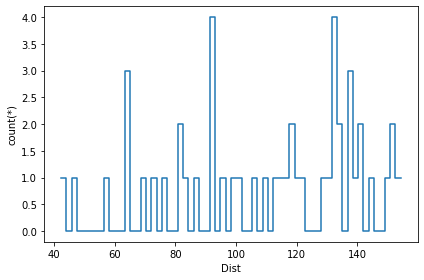

In [15]:
df_hyades.viz.histogram("Dist")

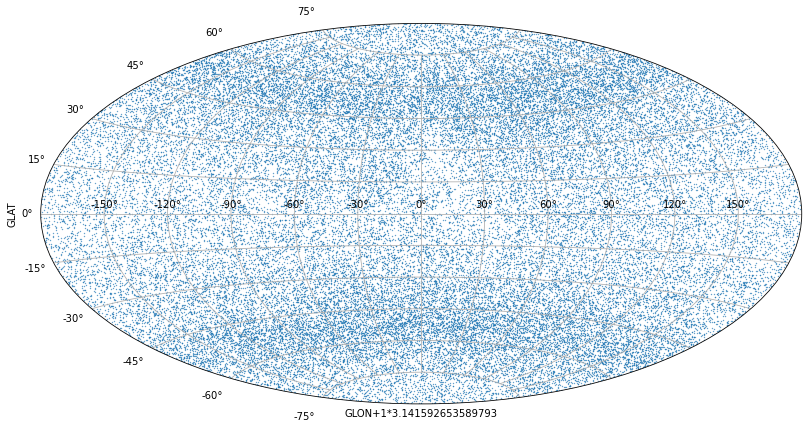

In [16]:
offset = 0
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

df_filtered_2.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1, c="C0")
df_filtered_2.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1,c="C0")
plt.grid(True)
plt.show()

(-150.0, 150.0)

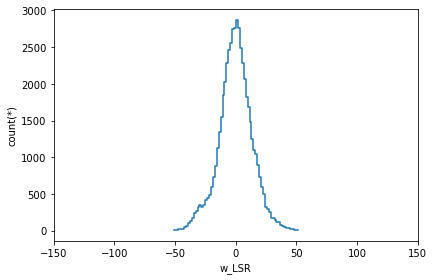

In [17]:
df_filtered_2.viz.histogram("w_LSR")
plt.xlim(-150, 150)

In [18]:
df_filtered_2.export(join(data_dir, "thin-AG-extended-filtered.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.94s =  0.0m =  0.0h   
 

Trying to figure out the "bump" from -30 to -40 km/s in w_LSR

In [19]:
df_filtered_2["theta"] = df_filtered_2.evaluate("arctan2(w_LSR, (v_LSR**2+u_LSR**2)**(1/2))")
df_filtered_2["phi"] = df_filtered_2.evaluate("arctan2(u_LSR, v_LSR)")
df_filtered_2

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo,theta,phi
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False,0.7111871987824524,-2.6275446098129627
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False,0.38929502176954045,-0.32370637031988636
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21

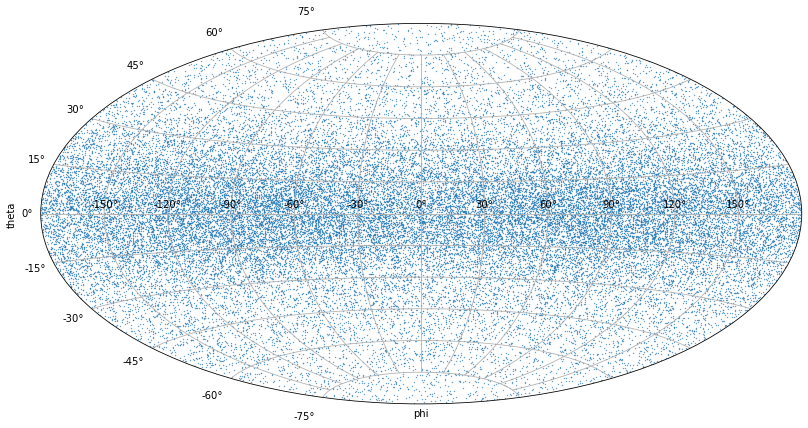

In [20]:
offset = 0
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
df_filtered_2.filter("Dist >100").viz.scatter(f"phi", "theta", length_check=False, s=0.1, alpha=1, c="C0")
# df_filtered_2.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1,c="C0")
plt.grid(True)
plt.show()

In [22]:
mid = -7.25
df_low = df_filtered_2.filter(f"(w < {mid})")
df_high = df_filtered_2.filter(f"(w > {mid})")

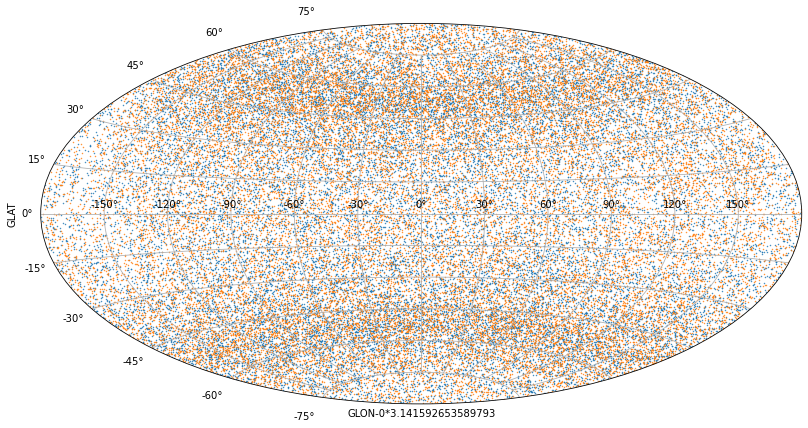

In [25]:
offset = -1
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

df_low.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.2, alpha=1)
df_high.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.2, alpha=1)
# df_low.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.5, alpha=1,c="C0")
plt.grid(True)
plt.show()

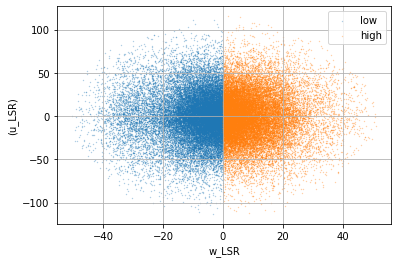

In [26]:
df_low.viz.scatter("w_LSR", "(u_LSR)", s=0.1, alpha=0.5, label="low")
df_high.viz.scatter("w_LSR", "(u_LSR)", s=0.1, alpha=0.5, label="high")
plt.legend()
plt.grid()

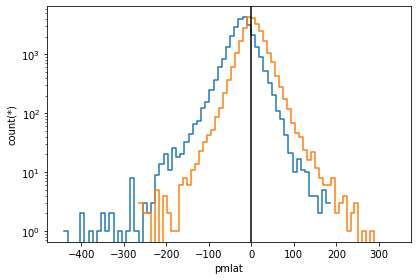

In [27]:
df_low.viz.histogram("pmlat")
df_high.viz.histogram("pmlat")
plt.yscale("log")
plt.axvline(0, c="k")